In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn import linear_model 
import matplotlib.pyplot as plt
import numpy as np
from math import *
import os
import warnings
warnings.filterwarnings("ignore")

**LOADING OF THE DATA**

In [3]:
# Loading the data from the files given

X_train = np.load(os.path.abspath('X_train_regression1.npy'))
y_train = np.load(os.path.abspath('y_train_regression1.npy'))
X_test  = np.load(os.path.abspath('X_test_regression1.npy'))



**PROBLEM 1 - RUDIMENTAR PREDICTION**

In [4]:
# y hat calculation using the formula given in the theory class

Xt       = np.transpose(X_train)
XtX      = np.matmul(Xt,X_train)
inv_XtX  = np.linalg.inv(XtX)
beta_hat = np.matmul(np.matmul(inv_XtX,Xt), y_train)
y_hat    = np.matmul(X_test,beta_hat)

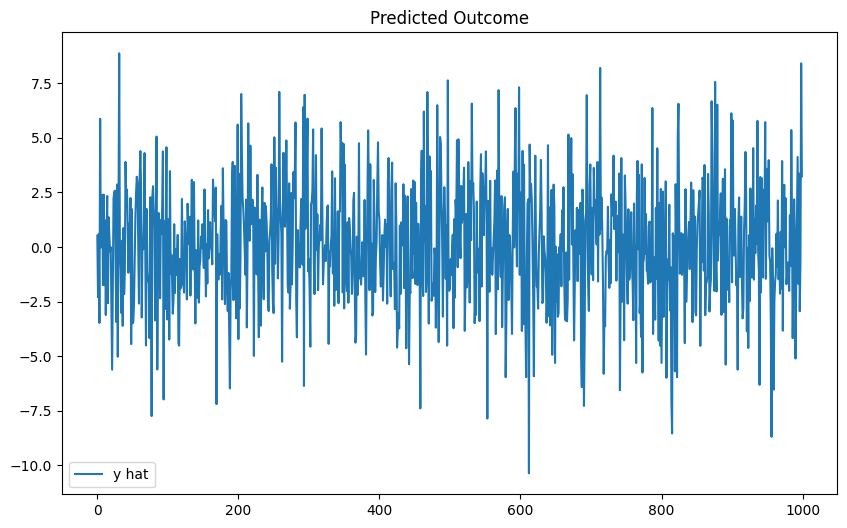

In [5]:
# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(y_hat,label='y hat')

#plt.plot(y_train,label = 'y train'# 
plt.title('Predicted Outcome')
plt.legend()

**REGULARIZATION**

In [6]:
# Centering of the data since we cannot use Regularization methods on uncentered data

X_train_mean  = np.mean(X_train,axis=0) # this is X'
y_train_mean  = np.mean(y_train,axis=0)
X_test_mean   = np.mean(X_test,axis=0) #nao sei se concordo

X_train_prime = X_train.copy()
y_train_prime = y_train.copy()
X_test_prime  = X_test.copy()

for i in range(10):
    X_train_prime[:,i] = X_train_prime[:,i] -  X_train_mean[i]
    X_test_prime[:,i]  = X_test_prime[:,i]  -  X_test_mean[i] 

# y_train_prime is a one dimensional array, and as such we don't include it in the for loop 

y_train_prime = y_train_prime -  y_train_mean 


LASSO

Notas: Não esquecer de dar scale das variaveis
testar com o gridsearch CV e com o LassoCV e ver o que dá melhor valor
LassoCV é mais rápido

In [7]:
# the value that gave the highest R^2 is cv=3

model = LassoCV(alphas=np.arange(0,10,0.01),cv=3,random_state=0).fit(X_train_prime,y_train_prime) 

selected_features_lasso = np.flatnonzero(model.coef_) # features that model kept 
X_train_prime_mod = X_train_prime[:,selected_features_lasso].copy()
# model.score(X_train_prime,y_train_prime) # measurement of the R^2 coefficient of the model 


# y hat calculation using the formula given in the theory class

Xt_lasso              = np.transpose(X_train_prime_mod)
XtX_lasso             = np.matmul(Xt_lasso,X_train_prime_mod)
inv_XtX_lasso         = np.linalg.inv(XtX_lasso)
beta_hat_prime_lasso  = np.matmul(np.matmul(inv_XtX_lasso,Xt_lasso), y_train_prime)
beta_zero_prime_lasso = y_train_mean - np.matmul(np.transpose(X_train_mean[selected_features_lasso]),beta_hat_prime_lasso)

m = [beta_zero_prime_lasso]
for k in range(len(selected_features_lasso)):
    m.append(beta_hat_prime_lasso[k,:])
beta_hat_lasso = np.array(m)

# Prediciton using the lasso model

ones = np.ones((1000,1))
X_test_lasso = np.hstack((ones,X_test[:,selected_features_lasso]))

y_hat_lasso = np.matmul(X_test_lasso,beta_hat_lasso)

In [8]:
# NOT REMOVING COLUMNS + LASSOCV
# y hat calculation using the formula given in the theory class

beta_hat_prime_lasso2  = model.coef_
beta_zero_prime_lasso2 = y_train_mean - np.matmul(np.transpose(X_train_mean),beta_hat_prime_lasso2)
m = [beta_zero_prime_lasso2[0]]
for k in range(len(beta_hat_prime_lasso2)):
    m.append(beta_hat_prime_lasso2[k])
beta_hat_lasso2 = np.array(m)

# Prediciton using the lasso model

ones = np.ones((1000,1))
X_test_lasso2 = np.hstack((ones,X_test))
y_hat_lasso2 = np.matmul(X_test_lasso2,beta_hat_lasso2)

In [9]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
loo = LeaveOneOut()
#model = Lasso(alpha = 0.1)
cv_results = cross_validate(model, X_train_prime, y_train_prime,scoring='neg_mean_squared_error', cv=loo)


In [10]:
cv_results.test_scores

AttributeError: 'dict' object has no attribute 'test_scores'

In [ ]:
np.mean(cv_results.get('test_score'))

-3.313470705311269

In [ ]:
# NOT REMOVING COLUMNS + GRIDSEARCHCV
params = {'alpha': (np.arange(0,5,0.01))}
modelLasso = Lasso()
lasso_model = GridSearchCV(modelLasso, params, scoring='neg_mean_squared_error', cv = 5).fit(X_train_prime, y_train_prime)
modelGrid = Lasso(alpha = lasso_model.best_params_['alpha']).fit(X_train_prime,y_train_prime)
#print(lasso_model.best_score_)
#print(modelGrid.coef_)


# y hat calculation using the formula given in the theory class

beta_hat_prime_lasso3  = modelGrid.coef_
beta_zero_prime_lasso3 = y_train_mean - np.matmul(np.transpose(X_train_mean),beta_hat_prime_lasso3)
m = [beta_zero_prime_lasso3[0]]
for k in range(len(beta_hat_prime_lasso3)):
    m.append(beta_hat_prime_lasso3[k])
beta_hat_lasso3 = np.array(m)

# Prediciton using the lasso model

ones = np.ones((1000,1))
X_test_lasso3 = np.hstack((ones,X_test))
y_hat_lasso3 = np.matmul(X_test_lasso3,beta_hat_lasso3)

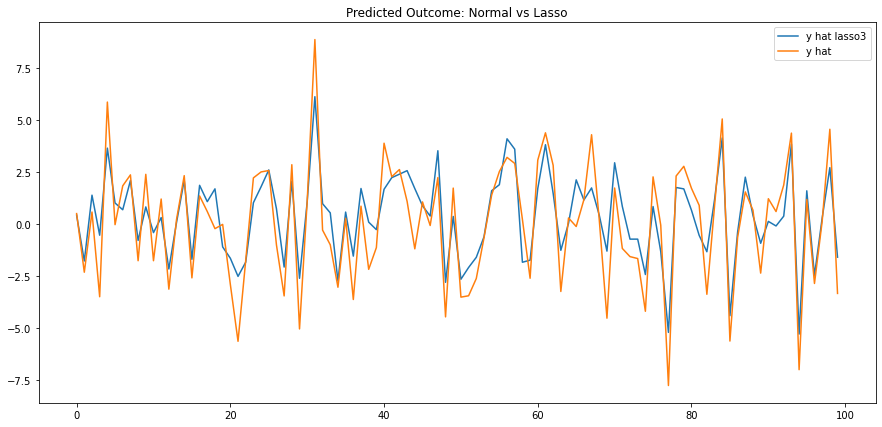

In [ ]:
# Plotting the results
plt.figure(figsize=(15,7))
#plt.plot(y_hat_lasso[0:100],label='y hat lasso')
#plt.plot(y_hat_lasso2[0:100],label='y hat lasso2')
plt.plot(y_hat_lasso3[0:100],label='y hat lasso3')
plt.plot(y_hat[0:100],label='y hat')

#plt.plot(y_train,label = 'y train'# 
plt.title('Predicted Outcome: Normal vs Lasso')
plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_traine = X_train[0:13,:]
X_teste = X_train[13:15,:]

scaler = StandardScaler().fit(X_traine) 

X_traine = scaler.transform(X_traine)
X_teste = scaler.transform(X_teste)
# Centering of the data since we cannot use Regularization methods on uncentered data

X_train_mean  = np.mean(X_traine,axis=0) # this is X'
y_train_mean  = np.mean(y_train,axis=0)

X_train_prime = X_traine.copy()
y_train_prime = y_train.copy()
X_test_prime  = X_teste.copy()

for i in range(10):
    X_train_prime[:,i] = X_train_prime[:,i] -  X_train_mean[i]
    X_test_prime[:,i]  = X_test_prime[:,i]  -  X_test_mean[i] 

# y_train_prime is a one dimensional array, and as such we don't include it in the for loop 

y_train_prime = y_train_prime -  y_train_mean

# LASSO 2 

model = LassoCV(alphas=np.arange(0,10,0.01),cv=6,random_state=0).fit(X_train_prime[0:13,:],y_train_prime[0:13,:]) 
beta_hat_prime_lasso2  = model.coef_
beta_zero_prime_lasso2 = y_train_mean[0:13] - np.matmul(np.transpose(X_train_mean[0:13]),beta_hat_prime_lasso2)
m = [beta_zero_prime_lasso2[0]]
for k in range(len(beta_hat_prime_lasso2)):
    m.append(beta_hat_prime_lasso2[k])
beta_hat_lasso5 = np.array(m)

# Prediciton using the lasso model

# Prediciton using the lasso model
ones = np.ones((2,1))
X = np.hstack((ones,X_teste))
y_prediciton = np.matmul(X, beta_hat_lasso5)
y_val = y_train[13:15]
sse = 0 
for n in range(2):
    sse = sse + (y_prediciton[n]-y_val[n][0])**2
sse

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is d

0.8453663406456767

In [ ]:
### Prediction for X_test

scaler = StandardScaler().fit(X_traine) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Centering of the data since we cannot use Regularization methods on uncentered data

X_train_mean  = np.mean(X_train,axis=0) # this is X'
y_train_mean  = np.mean(y_train,axis=0)
X_test_mean   = np.mean(X_test,axis=0)

X_train_prime = X_train.copy()
y_train_prime = y_train.copy()
X_test_prime  = X_test.copy()

for i in range(10):
    X_train_prime[:,i] = X_train_prime[:,i] -  X_train_mean[i]
    X_test_prime[:,i]  = X_test_prime[:,i]  -  X_test_mean[i] 

# y_train_prime is a one dimensional array, and as such we don't include it in the for loop 

y_train_prime = y_train_prime -  y_train_mean 

# LASSO 2 
# NOT REMOVING COLUMNS + LASSOCV
# y hat calculation using the formula given in the theory class

model = LassoCV(alphas=np.arange(0,10,0.01),cv=6,random_state=0).fit(X_train_prime,y_train_prime) 

beta_hat_prime_lasso2  = model.coef_
beta_zero_prime_lasso2 = y_train_mean - np.matmul(np.transpose(X_train_mean),beta_hat_prime_lasso2)
m = [beta_zero_prime_lasso2[0]]
for k in range(len(beta_hat_prime_lasso2)):
    m.append(beta_hat_prime_lasso2[k])
beta_hat_lasso2 = np.array(m)

# Prediciton using the lasso model
ones = np.ones((1000,1))
X_test_lasso2 = np.hstack((ones,X_test))
y_hat_lasso2 = np.matmul(X_test_lasso2,beta_hat_lasso2)

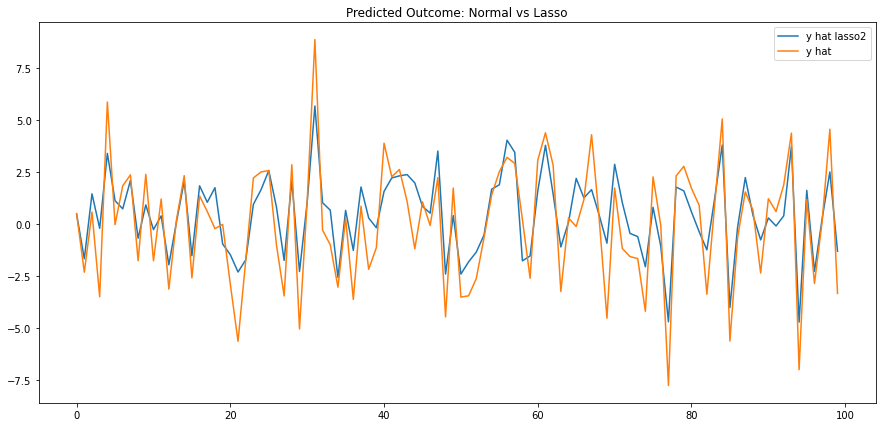

In [ ]:
# Plotting the results
plt.figure(figsize=(15,7))
#plt.plot(y_hat_lasso[0:100],label='y hat lasso')
plt.plot(y_hat_lasso2[0:100],label='y hat lasso2')
plt.plot(y_hat[0:100],label='y hat')

plt.title('Predicted Outcome: Normal vs Lasso')
plt.legend()



In [ ]:
# Benchmarking the normal equations procedure 
from sklearn.preprocessing import StandardScaler
X_traine = X_train[0:13,:]
X_teste = X_train[13:15,:]

scaler = StandardScaler().fit(X_traine) 

X_traine = scaler.transform(X_traine)
X_teste = scaler.transform(X_teste)

Xt       = np.transpose(X_traine)
XtX      = np.matmul(Xt,X_traine)
inv_XtX  = np.linalg.inv(XtX)
beta_hat = np.matmul(np.matmul(inv_XtX,Xt), y_train[0:13])
y_hat    = np.matmul(X_teste,beta_hat)

y_val = y_train[13:15]
sse = 0 
for n in range(2):
    sse = sse + (y_hat[n]-y_val[n][0])**2
sse[0]

61.59864522729553

RIDGE


In [ ]:
#cálculo matricial do ridge

Xt_prime       = np.transpose(X_train_prime)
XtX_prime      = np.matmul(Xt_prime,X_train_prime)
Y_hypperparameter =1
Y_hyperparameter_ridge = np.identity(np.shape(Xt_prime)[0])*Y_hypperparameter


inv_XtX_yI  = np.linalg.inv(XtX_prime + Y_hyperparameter_ridge)
beta_hat_rigde = np.matmul(np.matmul(inv_XtX_yI,Xt_prime), y_train_prime)




Scikit ridge cv - sem data centrada

In [ ]:
reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01)).fit(X_train, y_train)

print("Hiperparametor lameda dos slides  " + str(reg.alpha_))
print("B^1 =" +str(reg.coef_))
print("B^0 = " + str(reg.intercept_))
print("R^2 =" + str(reg.score(X_train, y_train)))
print(reg.best_score_)




Hiperparametor lameda dos slides  2.4
B^1 =[[-0.01007212 -0.53800143  0.72998949 -0.27018097  0.19889648  1.2090262
  -0.59113814  0.13615133  0.3819578   0.55343922]]
B^0 = [0.59837202]
R^2 =0.8907054330469559
-3.154318804408047


Scikit ridge cv - com data centrada

In [14]:
reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, scoring="neg_mean_squared_error", cv=None,store_cv_values=True ).fit(X_train_prime, y_train_prime)
print("Hiperparametor lameda dos slides  " + str(reg.alpha_))
beta_hat_ridge_cvLeaveOneOut = reg.coef_
print("B^1 =" +str(reg.coef_))
print("B^0 = " + str(reg.intercept_))
print("R^2 =" + str(reg.score(X_train_prime, y_train_prime)))
print(reg.best_score_)



Hiperparametor lameda dos slides  1.31
B^1 =[[-0.0599462  -0.50136074  0.81990349 -0.23942806  0.18658551  1.35812205
  -0.77310107  0.0800601   0.42731925  0.6029222 ]]
B^0 = 0.0
R^2 =0.9110720392893541
-2.167693140920147


Scikit ridge cv - com data centrada - verificar os valores de CV

In [15]:
reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False,scoring="neg_mean_squared_error", cv=3).fit(X_train_prime, y_train_prime)
print("Hiperparametor lameda dos slides  " + str(reg.alpha_))
print("B^1 =" +str(reg.coef_))
print("B^0 = " + str(reg.intercept_))
print("R^2 =" + str(reg.score(X_train_prime, y_train_prime)))
print(reg.best_score_)


Hiperparametor lameda dos slides  2.03
B^1 =[[-0.02130199 -0.53147039  0.75674441 -0.26425381  0.19527738  1.25387768
  -0.64182993  0.12150491  0.39374634  0.56745017]]
B^0 = 0.0
R^2 =0.8976760707262638
-2.186313411796816


In [16]:
reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, scoring="neg_mean_squared_error",cv=5).fit(X_train_prime, y_train_prime)
print("Hiperparametor lameda dos slides  " + str(reg.alpha_))
beta_hat_ridge_cv5 = reg.coef_
print("B^1 =" +str(reg.coef_))
print("B^0 = " + str(reg.intercept_))
print("R^2 =" + str(reg.score(X_train_prime, y_train_prime)))
print(reg.best_score_)



Hiperparametor lameda dos slides  2.6399999999999997
B^1 =[[-0.00467596 -0.54019926  0.714226   -0.27255571  0.20088167  1.18237282
  -0.56241172  0.14403879  0.37533845  0.54532561]]
B^0 = 0.0
R^2 =0.886174238917652
-2.5051897944994055


Otimizar valor de CV:

In [ ]:

cv_lameda_R = []
for cv_value in np.arange(2,14,1):
    reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, score="neg_mean_squared_error", cv=cv_value).fit(X_train_prime, y_train_prime)
    cv_lameda_R.append([ cv_value , reg.alpha_, reg.score(X_train_prime, y_train_prime)])
cv_lameda_R
print()

Do codigo acima concluimos que cv= 5, com Lameda (ou alpha)=5.98 produz o melhor R2, sendo que também convém experimentar e ver o SSE de cv=8, alpha=0,01 pq o R^2 dá mais alto(mas é um valor estranho já que fica constante ao longo dos cvs)
Para além disto, da secção "Scikit ridge cv - com data centrada" - encontramos um alpha= 1,31 e R^2 =0.9110720392893541, para cv=None o que corresponde a usar o método leave one out - que será mais efeciente segundo o scikit learn

Vamos prosseguir, calculando os valores de y_teste para cada uma destas trÊs opções e calculando o respetivo SSE

Ridge cv=5 com data centrada - isto é - sem Beta0 - trabalhei e tal


In [ ]:
#print(np.shape(X_test))
#print(np.shape(beta_hat_ridge_cv5))
y_hat_ridge_cv5 = np.matmul(X_test,np.transpose(beta_hat_ridge_cv5)) #aqui tenho duvidas se usamos [1 Xt ]Beta ou X*Beta, mas acho que é assim uma vez que não temos B0


(1000, 10)
(1, 10)


Ridge cv=8

In [ ]:
reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, cv=8).fit(X_train_prime, y_train_prime)
beta_hat_ridge_cv8 = reg.coef_
y_hat_ridge_cv8 = np.matmul(X_test,np.transpose(beta_hat_ridge_cv8)) 

Ridge leave one  out


In [ ]:
y_hat_ridge_cvLeaveOneOut = np.matmul(X_test,np.transpose(beta_hat_ridge_cvLeaveOneOut)) 

In [ ]:

y_hat_ridge = np.matmul(X_test,beta_hat_rigde)  #ridge calculado matricialmente

Vamos agora comparar estas opções a nível gráfico

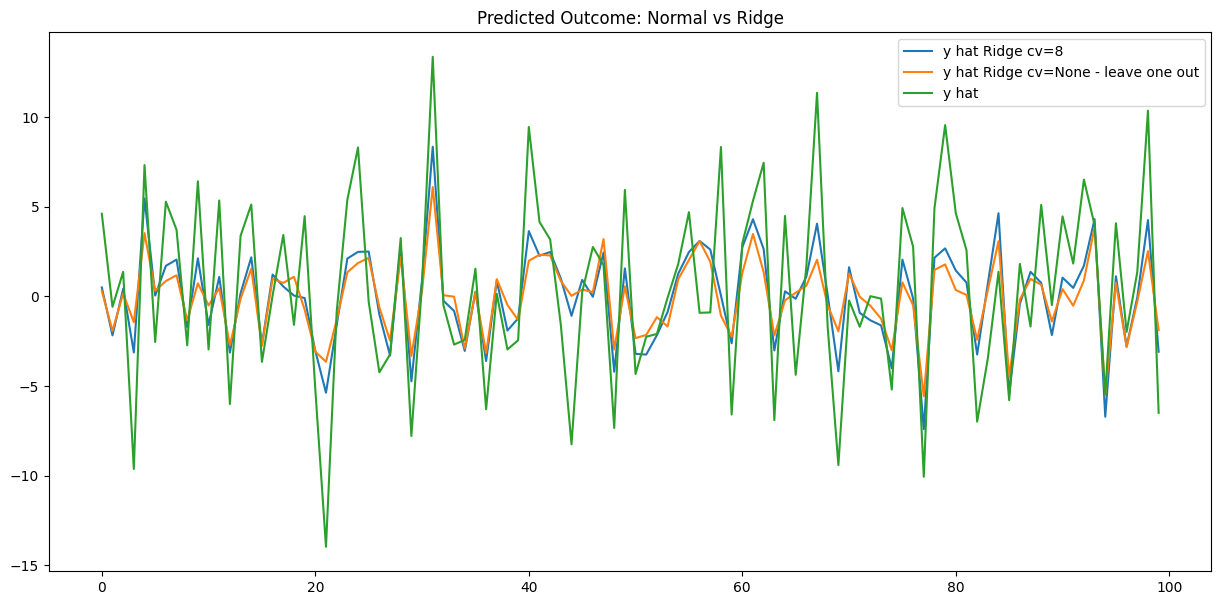

In [ ]:
# Plotting the results
plt.figure(figsize=(15,7))
#plt.plot(y_hat_ridge_cv5[0:100],label='y hat Ridge cv=5')
plt.plot(y_hat_ridge_cv8[0:100],label='y hat Ridge cv=8')
plt.plot(y_hat_ridge_cvLeaveOneOut[0:100],label='y hat Ridge cv=None - leave one out')
#plt.plot(y_hat_ridge[0:100],label='y hat Ridge sem cv')
y_hat    = np.matmul(X_test,beta_hat)
plt.plot(y_hat[0:100],label='y hat')

plt.title('Predicted Outcome: Normal vs Ridge')
plt.legend()


**Relemebrando**

cv= 5, com Lameda (ou alpha)=5.98 produz o melhor R2=0.8242128634861228, 
cv=8, alpha=0,01 pq o R^2=  0.9300445467775543 (mas é um valor estranho já que fica constante ao longo dos cvs)
"Scikit ridge cv - com data centrada" - leave one out - encontramos um alpha= 1,31 e R^2 =0.9110720392893541,

Vamos agora experimentar calcular o SSE para cada um dos métodos representados gráficamente acima. O objetivo disto é comparar os SSE e concluir quanto ao melhor ridge e compará-lo de forma objetiva com o Lasso
Para calcular os SSE, treinamos o modelo deixando um dado de fora (leave one out), depois aplicamos o modelo ao x de treino que ficou de fora e calculamos a diferença entre o seu resultado e o y do dado que ficou de fora. Fzemos o ^2 disto e somamos para a possibilidade de deixar de fora cada um dos 15 elementos

In [ ]:
#Este é uma das opções de ridge que se revelou melhor na análise acima - este envolve usarmos um cv=5 e centrarmos os dados antes e
#dizer fit_intercept false que é para o ridgecv não centrar os dados (isto provou-se dar um melhor sse do que se pedissemos ao Ridgecv para ser ele a centrar os dados)

SSE=0
for i in range(0,15):
    #X_train_exceptoSSE= X_train[i,:].copy()
    X_train_SSE=np.delete(X_train_prime, i, 0) #estamos a trabalhar com dados centrados; o que se faz nestas linhas é remover uma linha de cada
    Y_train_SSE=np.delete(y_train_prime, i, 0)
    reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, cv=5).fit(X_train_SSE, Y_train_SSE)
    beta_hat_ridge_cvLeaveOneOut = reg.coef_
    SSE= SSE + ( y_train_prime[i]- np.matmul(X_train_prime[i,:],np.transpose(beta_hat_ridge_cvLeaveOneOut)) )**2

SSE_average=  SSE/15  
print(SSE_average)

#sse= 46.34120465
#r^2=0.8242128634861228

[2.41759855]


In [ ]:
#esta opção é para um ridge com cv=none, o que significa que ele usa o cross validation com leave one out, e centrado tal como a opção acima

SSE=0
for i in range(0,15):
    #X_train_exceptoSSE= X_train[i,:].copy()
    X_train_SSE=np.delete(X_train_prime, i, 0) #estamos a trabalhar com dados centrados
    Y_train_SSE=np.delete(y_train_prime, i, 0)
    reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, cv=None).fit(X_train_SSE, Y_train_SSE)
    beta_hat_ridge_cvLeaveOneOut = reg.coef_
    SSE= SSE + ( y_train_prime[i]- np.matmul(X_train_prime[i,:],np.transpose(beta_hat_ridge_cvLeaveOneOut)) )**2
    
SSE_average=  SSE/15  
print(SSE_average)

#sse=52.15450335
#R^2 =0.9110720392893541

[2.83741268]


In [ ]:
#cv=8, que é mais uma vez uma das melhores opções da otimização de cvs feita acima (mais uma vez com dados centrados)

SSE=0
for i in range(0,15):
    #X_train_exceptoSSE= X_train[i,:].copy()
    X_train_SSE=np.delete(X_train_prime, i, 0) #estamos a trabalhar com dados centrados
    Y_train_SSE=np.delete(y_train_prime, i, 0)
    reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, cv=8).fit(X_train_SSE, Y_train_SSE)
    beta_hat_ridge_cvLeaveOneOut = reg.coef_
    SSE= SSE + ( y_train_prime[i]- np.matmul(X_train_prime[i,:],np.transpose(beta_hat_ridge_cvLeaveOneOut)) )**2
    
SSE_average=  SSE/15  
print(SSE_average)

#SSE= 50.93441224
#R^2=  0.9300445467775543 

[3.33195297]


In [ ]:
#o processo é o mesmo das analíses cima mas com Lasso. Isto permite comparar quantitativamente um SSE entre o ridge e o Lasso

SSE=0
for i in range(0,15):
    #X_train_exceptoSSE= X_train[i,:].copy()
    X_train_SSE=np.delete(X_train_prime, i, 0) #estamos a trabalhar com dados centrados
    Y_train_SSE=np.delete(y_train_prime, i, 0)
    reg = LassoCV(alphas=np.arange(0,10,0.01),cv=6,random_state=0).fit(X_train_SSE, Y_train_SSE) 
    beta_hat_ridge_cvLeaveOneOut = reg.coef_
    SSE= SSE + ( y_train_prime[i]- np.matmul(X_train_prime[i,:],np.transpose(beta_hat_ridge_cvLeaveOneOut)) )**2
    
SSE_average=  SSE/15  
print(SSE_average)

#SSE=52.88958718

[3.15150913]


Now we are going to do a different approach:
We will perform a LassoCv to check which are the best features to ignore (spare Beta) and then we will aplly ridge to get an optimized beta
After this, we should run it and calculate the sse with leave one out



In [23]:
# Centering of the data since we cannot use Regularization methods on uncentered data

X_train_mean  = np.mean(X_train,axis=0) # this is X'
y_train_mean  = np.mean(y_train,axis=0)
X_test_mean   = np.mean(X_test,axis=0) #nao sei se concordo

X_train_prime = X_train.copy()
y_train_prime = y_train.copy()
X_test_prime  = X_test.copy()

for i in range(10):
    X_train_prime[:,i] = X_train_prime[:,i] -  X_train_mean[i]
    X_test_prime[:,i]  = X_test_prime[:,i]  -  X_test_mean[i] 

# y_train_prime is a one dimensional array, and as such we don't include it in the for loop 

y_train_prime = y_train_prime -  y_train_mean 


model2 = LassoCV(alphas=np.arange(0,10,0.01),cv=6,fit_intercept=False,random_state=0).fit(X_train_prime, y_train_prime) 
model = Lasso(model2.alpha_).fit(X_train_prime, y_train_prime) 
beta_hat_prime_lasso_ridge  = model.coef_


X_train_prime_lasso_ridge=X_train_prime.copy()

for i in range(np.shape(beta_hat_prime_lasso_ridge)[0]-1, -1, -1):
    if beta_hat_prime_lasso_ridge[i]==0:
        X_train_prime_lasso_ridge = np.delete(X_train_prime_lasso_ridge, i, 1)
        X_train_mean = np.delete(X_train_mean, i, axis = 0)


reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, scoring="neg_mean_squared_error", cv=5).fit(X_train_prime_lasso_ridge, y_train_prime)
print("Best socre do ridge apos lasso")
print(reg.best_score_)



SSE=0
for i in range(0,15):
    #X_train_exceptoSSE= X_train[i,:].copy()
    X_train_SSE=np.delete(X_train_prime_lasso_ridge, i, 0) #estamos a trabalhar com dados centrados
    Y_train_SSE=np.delete(y_train_prime, i, 0)
    reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, cv=5).fit(X_train_SSE, Y_train_SSE)
    beta_hat_ridge_cvLeaveOneOut = reg.coef_
    beta_zero= y_train_mean - np.matmul((X_train_mean),np.transpose(beta_hat_ridge_cvLeaveOneOut))
    m = [beta_zero[0]]
    for k in range(((beta_hat_ridge_cvLeaveOneOut).shape[1])):
         m.append(beta_hat_ridge_cvLeaveOneOut[:,k][0])
    beta_hat_lasso_ridge = np.array(m)

    X_train_final = np.insert(X_train_prime_lasso_ridge[i,:],0,1)
    SSE= SSE + ( y_train[i] - np.matmul( X_train_final,(beta_hat_lasso_ridge)) )**2
    
SSE_average=  SSE/15  
print(SSE_average)


Best socre do ridge apos lasso
-1.4597853328491168
[2.48952299]


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate

# Centering of the data since we cannot use Regularization methods on uncentered data

X_train_mean  = np.mean(X_train,axis=0) # this is X'
y_train_mean  = np.mean(y_train,axis=0)
X_test_mean   = np.mean(X_test,axis=0) #nao sei se concordo

X_train_prime = X_train.copy()
y_train_prime = y_train.copy()
X_test_prime  = X_test.copy()

for i in range(10):
    X_train_prime[:,i] = X_train_prime[:,i] -  X_train_mean[i]
    X_test_prime[:,i]  = X_test_prime[:,i]  -  X_test_mean[i] 

# y_train_prime is a one dimensional array, and as such we don't include it in the for loop 

y_train_prime = y_train_prime -  y_train_mean 


model = LassoCV(alphas=np.arange(0,10,0.01),cv=6,fit_intercept = False, random_state=0).fit(X_train_prime, y_train_prime) 
beta_hat_prime_lasso_ridge  = model.coef_


X_train_prime_lasso_ridge=X_train_prime.copy()

for i in range(np.shape(beta_hat_prime_lasso_ridge)[0]-1, -1, -1):
    if beta_hat_prime_lasso_ridge[i]==0:
        X_train_prime_lasso_ridge = np.delete(X_train_prime_lasso_ridge, i, 1)
        X_train_mean = np.delete(X_train_mean, i, axis = 0)

reg = linear_model.RidgeCV(alphas=np.arange(0.01,10,0.01), fit_intercept=False, cv=5).fit(X_train_prime_lasso_ridge, y_train_prime)

loo = LeaveOneOut()
cv_results = cross_validate(reg, X_train_prime, y_train_prime,scoring='neg_mean_squared_error', cv=loo)




In [ ]:
print(np.mean(cv_results.get('test_score')))

-2.4175985545487335


A conclusão inicial é que o melhor método será o de Ridge com cv=5 o que faz sentido, pois costuma ser usado para quantidades de dados pequenos

Por muito estranho que pareça, a conjugação dos métodos lassocv e ridgecv que foi feita no último pedaço de código teve um sse pior do que outras opções com apenas ridge